### Gradient Descent for finding best fit, Saving and Loading Model for using many times, One Hot Coding and Testing and Training Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.DataFrame({"name" : ["david","laura","sanjay","wei","jeff",
                             "aamir", "venkat","virat","arthur","paul"],
                  "math":[92,56,88,70,80,49,65,35,66,67],
                  "cs": [98,68,81,80,83,52,66,30,68,73]})
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


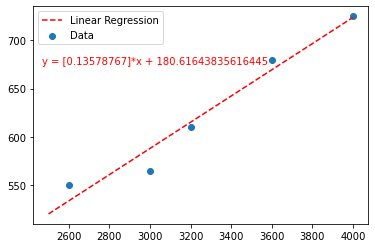

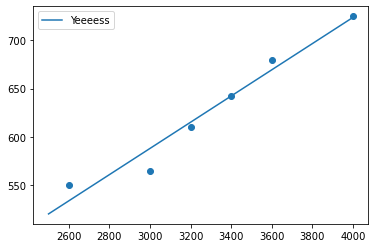

In [2]:
#An old task
df_old = pd.DataFrame({"area": [2600,3000,3200,3600,4000],
                      "price": [550,565,610,680,725]})
reg = linear_model.LinearRegression()
area = df_old.drop("price" , axis= "columns")
price = df_old["price"]
reg.fit(area,price)
a = reg.coef_ 
b = reg.intercept_
plt.scatter(df_old["area"], df_old["price"],label="Data")
plt.text(2470,675, "y = {}*x + {}".format(a,b), color="red")
x = np.linspace(2500,4000,1000)
plt.plot(x, a*x+b,"--r",label ="Linear Regression")
plt.legend()
plt.show()
#Predict
reg.predict([[3400]])
df_old2 = pd.DataFrame({"area": [2600,3000,3200,3400,3600,4000],
                      "price": [550,565,610,642.2945,680,725]})
y = df_old2.drop("price",axis="columns")
plt.scatter(y,df_old2["price"])
plt.plot(x,a*x+b,label="Yeeeess")
plt.legend()
plt.show()

### """How to find best line
We first draw a line and sum all errors to the actual data, then square it and divide to n to find mean squared error.
Mean Squared Error is called Cost Function, for some cases.
Gradient descent is an algortihm that finds best fit line for a given training data set. Basically, we find the minimum m and b values that would minimize the cost function or mean squared error. This is done by gradient descent algorithm. Thus, we will look at their partial derivatives with respect to m and b.
So if cost function is ms€ = 1/n *sum from i to n (y_i - y_predicted)^2 = 1/n * sum from i to n (y_i - (m*x_i + b))^2

Then, del ms€ / del m = 2/n* sum from i to n (-x_i)*(y_i-(m*x_i+b))
and del ms€/del b = 2/n* sum from i to n (-(y_i-(m*x_i + b)))
"""



In [3]:
def gradient_descent(x,y):
    m_curr = b_curr = 0 # m and b current are zero initally
    iterations = 10    #Make it 10000
    n = len(x)
    learning_rate = 0.08
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([val*2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum((y-y_predicted))
        m_curr = m_curr - md * learning_rate
        b_curr =b_curr - bd*learning_rate
        print("m {},b {}, cost {}, iteration: {}".format(m_curr,b_curr,cost,i))
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 4.96,b 1.44, cost 18.0, iteration: 0
m 0.4991999999999983,b 0.26879999999999993, cost -14.64, iteration: 1
m 4.451584000000002,b 1.426176000000001, cost 14.467200000000012, iteration: 2
m 0.892231679999997,b 0.5012275199999995, cost -11.561856000000018, iteration: 3
m 4.041314713600002,b 1.432759910400001, cost 11.64415488000002, iteration: 4
m 1.2008760606719973,b 0.7036872622079998, cost -9.113408102400015, iteration: 5
m 3.7095643080294423,b 1.4546767911321612, cost 9.387369111552017, iteration: 6
m 1.4424862661541864,b 0.881337636696883, cost -7.166739430440977, iteration: 7
m 3.4406683721083144,b 1.4879302070713722, cost 7.5824071296811155, iteration: 8
m 1.6308855378034224,b 1.0383405553279617, cost -5.619870646792631, iteration: 9


### Save and Load Trained Model
Save a model and reuse it many times.

In [4]:
df_old

,area,price
0,2600,550
1,3000,565
2,3200,610
3,3600,680
4,4000,725


In [5]:
model = linear_model.LinearRegression()
model.fit(df_old[['area']],df_old.price)
model.coef_ , model.intercept_, model.predict([[5000]])

(array([0.13578767]), 180.61643835616445, array([859.55479452]))

In [6]:
import pickle
#Save Model to a File Using Python Pickle
with open("model_pickle", "wb") as file:
    pickle.dump(model,file)
#Load saved Model
with open("model_pickle","rb") as file:
    mp = pickle.load(file)
mp.coef_, mp.intercept_,mp.predict([[5000]])

(array([0.13578767]), 180.61643835616445, array([859.55479452]))

In [7]:
"""#Save Trained Model using joblib

from sklearn.externals import joblib
joblib.dump(model,"model_joblib")

#Load Saved Model

mj = joblib.load("model_joblib")
mj.coef_, mj.intercept_, mj.predict([[5000]])
"""

'#Save Trained Model using joblib\n\nfrom sklearn.externals import joblib\njoblib.dump(model,"model_joblib")\n\n#Load Saved Model\n\nmj = joblib.load("model_joblib")\nmj.coef_, mj.intercept_, mj.predict([[5000]])\n'

### ML in Text Data
Categorical Variables and One How Encoding,
Categorical Variables are nominals, which are not listed and ordinal which have some order. Exp of ordinal could be that graduate, masters, phd or high, medium, low. Nominal do not have this type of order.

In [8]:
df3 = pd.DataFrame({"town" : ["MW X5","MW X5","MW X5","MW X5","MW X5",
                             "WAudi A5", "WAudi A5","WAudi A5","WAudi A5",
                              "Rercedez Benz C class","Rercedez Benz C class",
                              "Rercedez Benz C class","Rercedez Benz C class"],
                  "area":[2600,3000,3200,3600,4000,2600,2800,3300,3600,2600,2900,3100,3600],
                  "Price": [550,565,610,680,725,585,615,650,710,575,600,620,695]})
df3

,town,area,Price
0,MW X5,2600,550
1,MW X5,3000,565
2,MW X5,3200,610
3,MW X5,3600,680
4,MW X5,4000,725
5,WAudi A5,2600,585
6,WAudi A5,2800,615
7,WAudi A5,3300,650
8,WAudi A5,3600,710
9,Rercedez Benz C class,2600,575


In [9]:
#Create dummy variables
dummies = pd.get_dummies(df3.town)
dummies

,MW X5,Rercedez Benz C class,WAudi A5
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [10]:
#Merge two dataframes
merged = pd.concat([df3, dummies], axis ="columns")
merged

,town,area,Price,MW X5,Rercedez Benz C class,WAudi A5
0,MW X5,2600,550,1,0,0
1,MW X5,3000,565,1,0,0
2,MW X5,3200,610,1,0,0
3,MW X5,3600,680,1,0,0
4,MW X5,4000,725,1,0,0
5,WAudi A5,2600,585,0,0,1
6,WAudi A5,2800,615,0,0,1
7,WAudi A5,3300,650,0,0,1
8,WAudi A5,3600,710,0,0,1
9,Rercedez Benz C class,2600,575,0,1,0


In [11]:
final = merged.drop(["town"], axis="columns")
final

,area,Price,MW X5,Rercedez Benz C class,WAudi A5
0,2600,550,1,0,0
1,3000,565,1,0,0
2,3200,610,1,0,0
3,3600,680,1,0,0
4,4000,725,1,0,0
5,2600,585,0,0,1
6,2800,615,0,0,1
7,3300,650,0,0,1
8,3600,710,0,0,1
9,2600,575,0,1,0


### Dummy Variable Trap
When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. Therefore, these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

In [12]:
from sklearn.linear_model import LinearRegression
y = final.Price
x = final.drop("Price", axis="columns")
x = x.drop("WAudi A5", axis="columns")
y

0     550
1     565
2     610
3     680
4     725
5     585
6     615
7     650
8     710
9     575
10    600
11    620
12    695
Name: Price, dtype: int64

In [13]:
x

,area,MW X5,Rercedez Benz C class
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [14]:
model = LinearRegression()
model.fit(x,y)
model.predict([[2800,0,1]])  #2800 price car of rercedez benz

array([590.77563965])

In [15]:
model.score(x,y)

0.9573929037221873

In [16]:
model.predict([[3400,0,0]])  #3400 price car of WAudi A5

array([681.24166846])

### Using sklearn One Hot Encoder


First step is to use label encoder to convert town names into numbers


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df3le = df3
df3le.town = le.fit_transform(df3le.town)
df3le

,town,area,Price
0,0,2600,550
1,0,3000,565
2,0,3200,610
3,0,3600,680
4,0,4000,725
5,2,2600,585
6,2,2800,615
7,2,3300,650
8,2,3600,710
9,1,2600,575


In [18]:
x1 = df3le[["town","area"]].values
x1

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [19]:
y1 = df3le.Price.values
y1

array([550, 565, 610, 680, 725, 585, 615, 650, 710, 575, 600, 620, 695],
      dtype=int64)

### Now use one hot encoder to create dummy variables for each of the town

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("town", OneHotEncoder(),[0])],remainder = 'passthrough')

In [21]:
x1 = ct.fit_transform(x1)
x1

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [22]:
x1 = x1[:,1:]
x1

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [23]:
model.fit(x1,y1)
model.predict([[0,1,3400]])  #3400 price car of WAudi A5

array([681.24166846])

In [24]:
model.predict([[1,0,2800]]) # 2800 price car in Rercedez Benz

array([590.77563965])

### Exercise

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())


In [25]:

df2 = pd.DataFrame({"name" : ["BMW X5","BMW X5","BMW X5","BMW X5","BMW X5",
                             "Audi A5", "Audi A5","Audi A5","Audi A5",
                              "Mercedez Benz C class","Mercedez Benz C class",
                              "Mercedez Benz C class","Mercedez Benz C class"],
                  "Mileage":[69000,35000,57000,22500,46000,59000,52000,72000,
                            91000,67000,83000,79000,59000],
                  "Sell Price": [18000,34000,26100,40000,31500,29400,32000,19300,
                                12000,22000,20000,21000,33000],
                   "Age":[6,3,5,2,4,5,5,6,8,6,7,7,5]})
df2

,name,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [26]:
dummies = pd.get_dummies(df2["name"])
dummies
merged = pd.concat([dummies, df2],axis= "columns")
merged

,Audi A5,BMW X5,Mercedez Benz C class,name,Mileage,Sell Price,Age
0,0,1,0,BMW X5,69000,18000,6
1,0,1,0,BMW X5,35000,34000,3
2,0,1,0,BMW X5,57000,26100,5
3,0,1,0,BMW X5,22500,40000,2
4,0,1,0,BMW X5,46000,31500,4
5,1,0,0,Audi A5,59000,29400,5
6,1,0,0,Audi A5,52000,32000,5
7,1,0,0,Audi A5,72000,19300,6
8,1,0,0,Audi A5,91000,12000,8
9,0,0,1,Mercedez Benz C class,67000,22000,6


In [27]:
#Dropping for dummy variable trap
merged = merged.drop(["name","Mercedez Benz C class" ], axis="columns")
merged

,Audi A5,BMW X5,Mileage,Sell Price,Age
0,0,1,69000,18000,6
1,0,1,35000,34000,3
2,0,1,57000,26100,5
3,0,1,22500,40000,2
4,0,1,46000,31500,4
5,1,0,59000,29400,5
6,1,0,52000,32000,5
7,1,0,72000,19300,6
8,1,0,91000,12000,8
9,0,0,67000,22000,6


In [28]:
final = merged.drop(["Sell Price"], axis= "columns")
final

,Audi A5,BMW X5,Mileage,Age
0,0,1,69000,6
1,0,1,35000,3
2,0,1,57000,5
3,0,1,22500,2
4,0,1,46000,4
5,1,0,59000,5
6,1,0,52000,5
7,1,0,72000,6
8,1,0,91000,8
9,0,0,67000,6


In [29]:
y = merged["Sell Price"]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(final,y)
model.score(final,y)   #The accuracy of the model

0.9417050937281083

In [30]:
#Price of mercedez benz that is 4 yr old with mileage 45000
model.predict([[0,0,45000,4]])

array([36991.31721061])

In [31]:
#Price of BMW X5 that is 7 yr old with mileage 86000
model.predict([[0,1,86000,7]])

array([11080.74313219])

###  Training and Testing Avaible Data


We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function that can predict a price by taking mileage and age of the car as input. We will use sklearn train_test_split method to split training and testing dataset


In [40]:
#We normally have 20 data but here only written 5. Think of that we have splitted the data set.
df5 = pd.DataFrame({"Mileage":[69000,35000,57000,22500,46000],
                   "Age": [6,3,5,2,4],
                   "Price": [18000,34000,26100,40000,31500]})
df5

,Mileage,Age,Price
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


### Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)


The approach we are going to use here is to split available data in two sets

    1.Training: We will train our model on this dataset
    2.Testing: We will use this subset to make actual predictions using trained model

The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.



In [45]:
x = df5[["Mileage", "Age"]]
y = df5["Price"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.6) #Thirty percent
x_train

,Mileage,Age
3,22500,2
2,57000,5


In [46]:
x_test

,Mileage,Age
4,46000,4
1,35000,3
0,69000,6


In [47]:
y_train

3    40000
2    26100
Name: Price, dtype: int64

In [48]:
y_test

4    31500
1    34000
0    18000
Name: Price, dtype: int64

In [49]:
#Now running linear regression model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [53]:
clf.predict(x_test), y_test

(array([30531.88405949, 34963.76811899, 21265.21739283]),
 4    31500
 1    34000
 0    18000
 Name: Price, dtype: int64)

In [55]:
clf.score(x_test,y_test)

0.9154483098951827